In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pyfolio as pf

C:\Users\Kazbek\anaconda3\lib\site-packages\pyfolio\pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [4]:
etfs = ['SPY','EFA','TLT','SHY']
data = pd.concat([pd.read_csv(f"Global_Macro_ETFs/{etf}.csv", index_col = 'date', parse_dates = True)['adjClose'].rename(etf) for etf in etfs], axis = 1)

In [5]:
data = data.loc['2004-11-04':'2021-09-29']
data

,SPY,EFA,TLT,SHY
date,,,,
2004-11-04 00:00:00+00:00,83.194156,31.331646,51.648120,62.098932
2004-11-05 00:00:00+00:00,83.715232,31.478403,51.083819,61.939743
2004-11-08 00:00:00+00:00,83.593887,31.259301,50.903475,61.909421
2004-11-09 00:00:00+00:00,83.429708,31.180755,50.874387,61.954903
2004-11-10 00:00:00+00:00,83.493954,31.120811,50.682409,61.879099
...,...,...,...,...
2021-09-23 00:00:00+00:00,443.180000,81.060000,148.360000,86.130000
2021-09-24 00:00:00+00:00,443.910000,80.300000,146.910000,86.100000
2021-09-27 00:00:00+00:00,442.640000,80.250000,146.370000,86.090000


In [48]:
lookback_period = 84
returns = data.pct_change(lookback_period)
returns

,SPY,EFA,TLT,SHY
date,,,,
2004-11-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2004-11-05 00:00:00+00:00,NaN,NaN,NaN,NaN
2004-11-08 00:00:00+00:00,NaN,NaN,NaN,NaN
2004-11-09 00:00:00+00:00,NaN,NaN,NaN,NaN
2004-11-10 00:00:00+00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-09-23 00:00:00+00:00,0.066584,0.020179,0.069382,-0.001385
2021-09-24 00:00:00+00:00,0.066225,0.011242,0.060756,-0.001964
2021-09-27 00:00:00+00:00,0.062617,0.008732,0.061163,-0.002080


In [49]:
rets = returns.loc[~returns['SPY'].isnull()]
rets

,SPY,EFA,TLT,SHY
date,,,,
2005-03-08 00:00:00+00:00,0.057701,0.108503,0.028954,-0.004861
2005-03-09 00:00:00+00:00,0.039431,0.098335,0.023330,-0.002674
2005-03-10 00:00:00+00:00,0.043264,0.109658,0.033219,-0.002926
2005-03-11 00:00:00+00:00,0.037988,0.112184,0.026266,-0.003904
2005-03-14 00:00:00+00:00,0.043651,0.110753,0.036328,-0.003054
...,...,...,...,...
2021-09-23 00:00:00+00:00,0.066584,0.020179,0.069382,-0.001385
2021-09-24 00:00:00+00:00,0.066225,0.011242,0.060756,-0.001964
2021-09-27 00:00:00+00:00,0.062617,0.008732,0.061163,-0.002080


In [54]:
sum_df = pd.DataFrame(columns = ['SPY','EFA','TLT','SPYinP','EFAinP','TLTinP'])
timer = 5
print('Lookback period is %d trading days'  %lookback_period)
print('Rebalance every %d trading days' %timer)
print()
for i in range(len(rets)):
    if i%timer == 0:
        ndx = rets.iloc[i:i+timer].index
        vrem_df = data.loc[ndx,['SPY','EFA','TLT']]
        if rets.iat[i,0] > rets.iat[i,1]: # relative momentum check SPY/EFA
            best = 'SPY'
        else:
            best = 'EFA'
        if best == 'SPY': #absolute momentum check for SPY
            if rets.iat[i,0] > rets.iat[i,3]:
                vrem_df['SPYinP'] = 1.0
                vrem_df['EFAinP'] = 0.0
                vrem_df['TLTinP'] = 0.0
            else:
                vrem_df['SPYinP'] = 0.0
                vrem_df['EFAinP'] = 0.0
                vrem_df['TLTinP'] = 1.0
                
                best = 'TLT'
        else: #absolute momentum check for EFA
            if rets.iat[i,1] > rets.iat[i,3]:
                vrem_df['SPYinP'] = 0.0
                vrem_df['EFAinP'] = 1.0
                vrem_df['TLTinP'] = 0.0
            else:
                vrem_df['SPYinP'] = 0.0
                vrem_df['EFAinP'] = 0.0
                vrem_df['TLTinP'] = 1.0
                best = 'TLT'
        print(rets.index[i],best)
        
        sum_df = pd.concat([sum_df,vrem_df])
        
sum_df['SPYCh%'] = sum_df['SPY'].pct_change().fillna(0.0)
sum_df['EFACh%'] = sum_df['EFA'].pct_change().fillna(0.0)
sum_df['TLTCh%'] = sum_df['TLT'].pct_change().fillna(0.0)
sum_df['Portfolio_Ch%'] = 0.0
for i in range(1,len(sum_df)): 
    sum_df.iloc[i,9] = (sum_df.iloc[i-1,3:6].values*sum_df.iloc[i,6:9].values).sum()
sum_df['Val_ch'] = sum_df['Portfolio_Ch%'] + 1
sum_df['CumulEquity'] = sum_df['Val_ch'].cumprod()

Lookback period is 84 trading days
Rebalance every 5 trading days

2005-03-08 00:00:00+00:00 EFA
2005-03-15 00:00:00+00:00 EFA
2005-03-22 00:00:00+00:00 EFA
2005-03-30 00:00:00+00:00 EFA
2005-04-06 00:00:00+00:00 EFA
2005-04-13 00:00:00+00:00 EFA
2005-04-20 00:00:00+00:00 EFA
2005-04-27 00:00:00+00:00 TLT
2005-05-04 00:00:00+00:00 TLT
2005-05-11 00:00:00+00:00 EFA
2005-05-18 00:00:00+00:00 TLT
2005-05-25 00:00:00+00:00 SPY
2005-06-02 00:00:00+00:00 SPY
2005-06-09 00:00:00+00:00 TLT
2005-06-16 00:00:00+00:00 TLT
2005-06-23 00:00:00+00:00 SPY
2005-06-30 00:00:00+00:00 TLT
2005-07-08 00:00:00+00:00 SPY
2005-07-15 00:00:00+00:00 SPY
2005-07-22 00:00:00+00:00 SPY
2005-07-29 00:00:00+00:00 SPY
2005-08-05 00:00:00+00:00 SPY
2005-08-12 00:00:00+00:00 EFA
2005-08-19 00:00:00+00:00 SPY
2005-08-26 00:00:00+00:00 EFA
2005-09-02 00:00:00+00:00 EFA
2005-09-12 00:00:00+00:00 EFA
2005-09-19 00:00:00+00:00 EFA
2005-09-26 00:00:00+00:00 EFA
2005-10-03 00:00:00+00:00 EFA
2005-10-10 00:00:00+00:00 EFA
200

2010-12-01 00:00:00+00:00 SPY
2010-12-08 00:00:00+00:00 SPY
2010-12-15 00:00:00+00:00 SPY
2010-12-22 00:00:00+00:00 SPY
2010-12-30 00:00:00+00:00 SPY
2011-01-06 00:00:00+00:00 SPY
2011-01-13 00:00:00+00:00 SPY
2011-01-21 00:00:00+00:00 SPY
2011-01-28 00:00:00+00:00 SPY
2011-02-04 00:00:00+00:00 SPY
2011-02-11 00:00:00+00:00 SPY
2011-02-18 00:00:00+00:00 SPY
2011-02-28 00:00:00+00:00 SPY
2011-03-07 00:00:00+00:00 SPY
2011-03-14 00:00:00+00:00 SPY
2011-03-21 00:00:00+00:00 SPY
2011-03-28 00:00:00+00:00 SPY
2011-04-04 00:00:00+00:00 SPY
2011-04-11 00:00:00+00:00 SPY
2011-04-18 00:00:00+00:00 SPY
2011-04-26 00:00:00+00:00 EFA
2011-05-03 00:00:00+00:00 EFA
2011-05-10 00:00:00+00:00 EFA
2011-05-17 00:00:00+00:00 SPY
2011-05-24 00:00:00+00:00 SPY
2011-06-01 00:00:00+00:00 SPY
2011-06-08 00:00:00+00:00 TLT
2011-06-15 00:00:00+00:00 TLT
2011-06-22 00:00:00+00:00 TLT
2011-06-29 00:00:00+00:00 SPY
2011-07-07 00:00:00+00:00 SPY
2011-07-14 00:00:00+00:00 EFA
2011-07-21 00:00:00+00:00 SPY
2011-07-28

2016-12-07 00:00:00+00:00 SPY
2016-12-14 00:00:00+00:00 SPY
2016-12-21 00:00:00+00:00 SPY
2016-12-29 00:00:00+00:00 SPY
2017-01-06 00:00:00+00:00 SPY
2017-01-13 00:00:00+00:00 SPY
2017-01-23 00:00:00+00:00 SPY
2017-01-30 00:00:00+00:00 SPY
2017-02-06 00:00:00+00:00 SPY
2017-02-13 00:00:00+00:00 SPY
2017-02-21 00:00:00+00:00 SPY
2017-02-28 00:00:00+00:00 SPY
2017-03-07 00:00:00+00:00 SPY
2017-03-14 00:00:00+00:00 SPY
2017-03-21 00:00:00+00:00 EFA
2017-03-28 00:00:00+00:00 EFA
2017-04-04 00:00:00+00:00 EFA
2017-04-11 00:00:00+00:00 EFA
2017-04-19 00:00:00+00:00 EFA
2017-04-26 00:00:00+00:00 EFA
2017-05-03 00:00:00+00:00 EFA
2017-05-10 00:00:00+00:00 EFA
2017-05-17 00:00:00+00:00 EFA
2017-05-24 00:00:00+00:00 EFA
2017-06-01 00:00:00+00:00 EFA
2017-06-08 00:00:00+00:00 EFA
2017-06-15 00:00:00+00:00 EFA
2017-06-22 00:00:00+00:00 EFA
2017-06-29 00:00:00+00:00 EFA
2017-07-07 00:00:00+00:00 EFA
2017-07-14 00:00:00+00:00 EFA
2017-07-21 00:00:00+00:00 EFA
2017-07-28 00:00:00+00:00 EFA
2017-08-04

In [21]:
sum_df['2005-06-03':'2005-06-08']

,SPY,EFA,TLT,SPYinP,EFAinP,TLTinP,SPYCh%,EFACh%,TLTCh%,Portfolio_Ch%,Val_ch,CumulEquity
2005-06-03 00:00:00+00:00,86.766946,32.685111,56.853861,0.0,1.0,0.0,-0.005051,-0.009350,-0.008226,-0.009350,0.990650,0.985822
2005-06-06 00:00:00+00:00,86.687508,32.901263,57.152307,0.0,1.0,0.0,-0.000916,0.006613,0.005249,0.006613,1.006613,0.992341
2005-06-07 00:00:00+00:00,86.752499,33.041867,57.605944,1.0,0.0,0.0,0.000750,0.004274,0.007937,0.004274,1.004274,0.996582
2005-06-08 00:00:00+00:00,86.593630,32.947432,57.331374,1.0,0.0,0.0,-0.001831,-0.002858,-0.004766,-0.001831,0.998169,0.994757


Start date,2005-03-08
End date,2021-09-29
Total months,198
,Backtest
Annual return,10.003%
Cumulative returns,384.549%
Annual volatility,15.361%
Sharpe ratio,0.70
Calmar ratio,0.43
Stability,0.97
Max drawdown,-23.511%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,23.51,2010-04-23,2010-07-13,2011-02-11,211
1,19.83,2008-12-30,2009-05-13,2009-09-08,181
2,18.50,2020-02-19,2020-03-18,2020-08-24,134
3,18.31,2006-05-09,2006-07-18,2007-04-10,241
4,18.31,2012-04-02,2012-11-14,2013-05-17,295


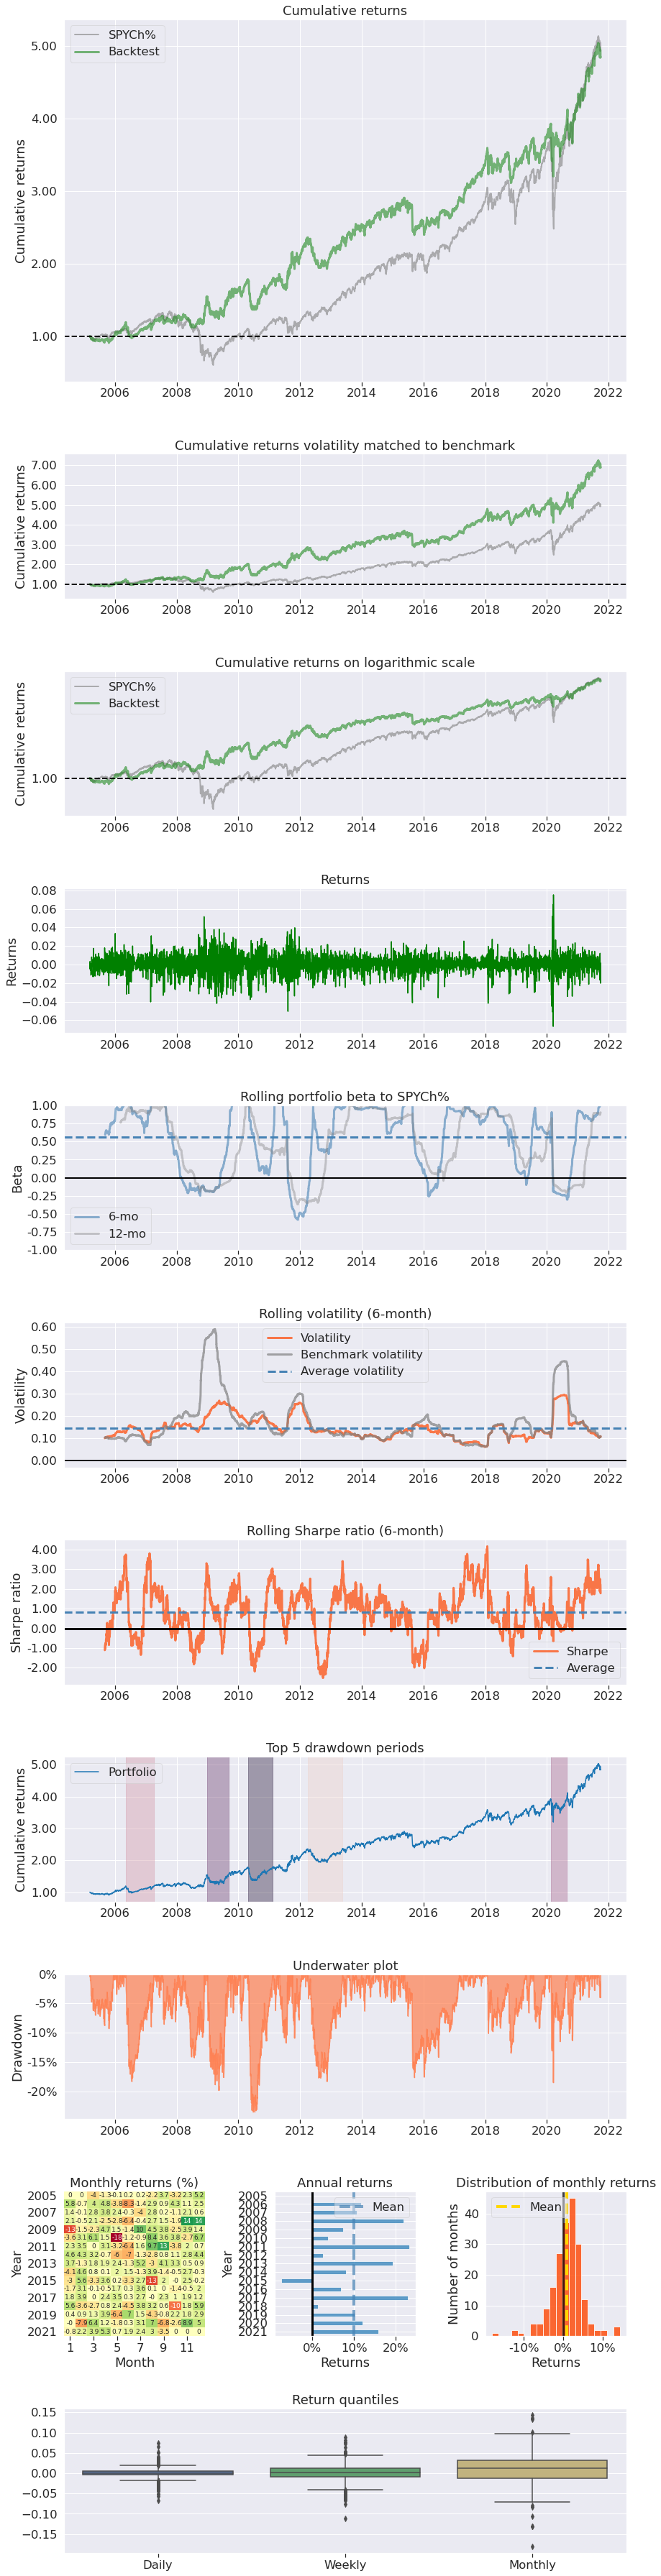

In [55]:
pf.create_returns_tear_sheet(sum_df['Portfolio_Ch%'], benchmark_rets = sum_df['SPYCh%'])

In [56]:
benchmarking = pd.concat([pf.timeseries.aggregate_returns(sum_df['Portfolio_Ch%'],'yearly'),pf.timeseries.aggregate_returns(sum_df['SPYCh%'],'yearly')], axis = 1)
benchmarking

<ipython-input-56-a47b53fae7ec>:1: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  benchmarking = pd.concat([pf.timeseries.aggregate_returns(sum_df['Portfolio_Ch%'],'yearly'),pf.timeseries.aggregate_returns(sum_df['SPYCh%'],'yearly')], axis = 1)


,Portfolio_Ch%,SPYCh%
2005,0.003475,0.035747
2006,0.116461,0.158482
2007,0.106574,0.051356
2008,0.219789,-0.368069
2009,0.074274,0.263661
2010,0.037929,0.150577
2011,0.232492,0.018879
2012,0.025987,0.159917
2013,0.193511,0.323067
2014,0.080576,0.134621
